In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pycbc.cosmology import redshift
import numpy
import matplotlib.pyplot as plt

from pycbc.psd.read import from_txt
from pycbc.waveform import get_fd_waveform
from pycbc.filter import sigma
from pycbc.cosmology import redshift
from tqdm import tqdm

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
snr_vals = h5py.File('./bbh_10e6.h5', 'r')
snr_vals.keys()

<KeysViewHDF5 ['H1', 'L1']>

In [3]:
C40 = snr_vals['H1'][:]
C20 = snr_vals['L1'][:]
net_snr = np.sqrt(C40**2 + C20**2)

In [4]:
sli = net_snr > 10

In [5]:
det_snr = net_snr[sli]

In [6]:
simulated_data = h5py.File('./bbh_upper_10e6', 'r')
simulated_data.keys()

<KeysViewHDF5 ['coa_phase', 'dec', 'distance', 'inclination', 'mass1', 'mass2', 'polarization', 'q', 'ra', 'redshift', 'spin1_a', 'spin1_azimuthal', 'spin1_polar', 'spin1x', 'spin1y', 'spin1z', 'spin2_a', 'spin2_azimuthal', 'spin2_polar', 'spin2x', 'spin2y', 'spin2z', 'srcmass1', 'srcmass2', 'total_rate']>

In [7]:
mass1 = simulated_data['mass1'][:]
mass2 = simulated_data['mass2'][:]
tot_mass = mass1 + mass2

In [8]:
det_tot_mass = tot_mass[sli]

In [9]:
dist = simulated_data['distance'][:]

In [10]:
det_dist = dist[sli]

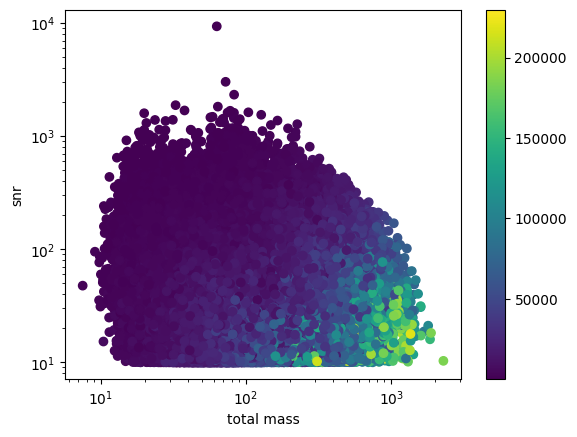

In [11]:
plt.scatter(det_tot_mass, det_snr, c=det_dist)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('total mass')
plt.ylabel('snr')
plt.colorbar()
plt.show()

In [12]:
z_det = redshift(det_dist)

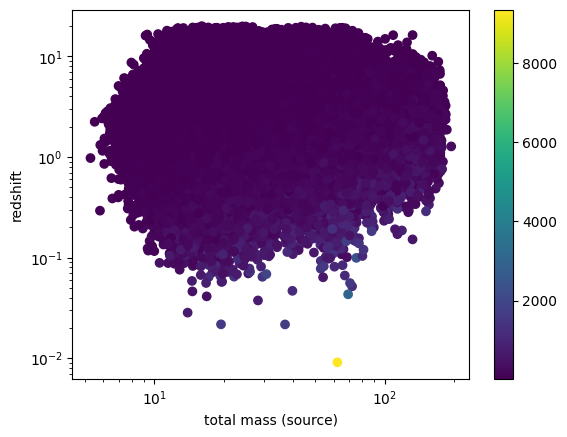

In [13]:
plt.scatter(det_tot_mass/(1+z_det), z_det, c=det_snr)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('total mass (source)')
plt.ylabel('redshift')
plt.colorbar()
plt.show()

In [14]:
det_masses = np.logspace(1, 3, 1000)

In [15]:
snr = []
df = 0.01
f_low = 5.1
for i in det_masses:
    
    apx = "IMRPhenomXPHM"
    hp, hc = get_fd_waveform(approximant=apx,
                             mass1=i,
                             mass2=i,
                             spin1z=0.9,
                             spin2z=0.4,
                             inclination=0,
                             coa_phase=2.45,
                             delta_f=df,
                            # distance=8.83,
                             f_lower=f_low,
                            f_final=2000)

    
    psd = from_txt('./ce_strain/cosmic_explorer_strain.txt', 
                   low_freq_cutoff=f_low, length=len(hp), delta_f=df)
    
    amp = sigma(hp, psd=psd, low_frequency_cutoff=f_low)
    snr.append(amp)

In [16]:
dist_lum = np.array(snr) / 8

In [17]:
z = redshift(dist_lum)

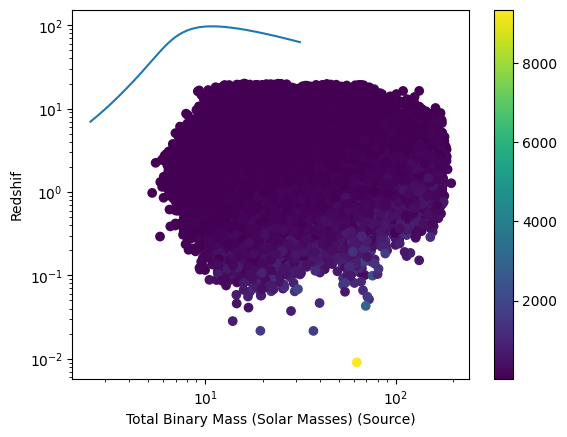

In [18]:
plt.scatter(det_tot_mass/(1+z_det), z_det, c=det_snr)
plt.plot((det_masses*2)/(1+z), z)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Total Binary Mass (Solar Masses) (Source)')
plt.ylabel('Redshif')
plt.colorbar()
plt.show()